In [1]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt
import pylab

import scipy.io
from sklearn import cluster
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import pairwise_distances

stock_list =  ['PETR', 'ITUB', 'BBDC', 'ABEV', 'VALE', 'SANB', 'BBAS', 'LIQO',
               'GOLL', 'VIVT', 'B3SA', 'BBSE', 'JBSS', 'AZUL', 'ELET', 'SUZB',
               'WEGE', 'CRFB', 'MGLU', 'FIBR', 'EGIE', 'LREN', 'SBSP', 'IRBR',
               'RAIL', 'CPFE', 'RENT', 'BRDT', 'BRKM', 'TIMP', 'CCRO', 'LAME',
               'GGBR', 'HAPV', 'NATU', 'RADL', 'BRFS', 'PCAR', 'CSNA', 'GNDI',
               'CMIG', 'CIEL', 'CSAN', 'HYPE', 'EQTL', 'KLBN', 'KROT', 'PSSA',
               'MULT', 'REDE', 'BTOW', 'PMAM', 'EMBR', 'SULA', 'MDIA', 'CPLE',
               'BRML', 'ALPA', 'UGPA', 'BRAP', 'ENBR', 'USIM', 'CGAS', 'ODPV',
               'BRSR', 'TAEE', 'DASA', 'ESTC', 'OIBR', 'MRVE', 'CESP', 'CSMG',
               'DTEX', 'SAPR', 'CYRE', 'IGTA', 'CVCB', 'ENEV', 'ALUP', 'SMTO',
               'TOTS', 'GOAU', 'LCAM', 'ELPL', 'GRND', 'FLRY', 'VVAR', 'QUAL',
               'BIDI', 'ECOR', 'LINX', 'SMLS', 'BKBR', 'ALSC', 'HGTX', 'TIET',
               'COCE', 'ARZZ', 'MPLU', 'EZTC', 'ABCB', 'BRPR', 'MRFG', 'TRPL',
               'LIGT', 'MOVI', 'POMO', 'ENAT', 'MYPK', 'SEER', 'CAML', 'UNIP',
               'RAPT', 'LEVE', 'BEEF', 'MAGG', 'TUPY', 'JSLG', 'WSON', 'PARD',
               'TEND', 'SSBR', 'PRIO', 'CNTO', 'CLSC', 'FESA', 'TGMA', 'SCAR',
               'OFSA', 'EVEN', 'WIZS', 'DIRR', 'SLCE', 'VULC', 'JHSF', 'AMAR',
               'LLIS', 'VLID', 'MILS', 'FRAS', 'GUAR', 'TRIS', 'ROMI', 'SHUL',
               'PTBL', 'HBOR', 'LPSB', 'CGRA', 'CREM', 'PFRM', 'SGPS', 'SQIA',
               'LOGN', 'RDNI', 'TPIS', 'FJTA', 'PINE', 'CARD', 'GFSA', 'UCAS',
               'POSI', 'APER', 'MTSA', 'FHER', 'RSID', 'ETER', 'GSHP', 'PDGR',
               'CRDE', 'LUPA']

# stock_list =  ['PETR', 'ITUB', 'BBDC', 'ABEV', 'VALE', 'BBAS', 'GOLL', 'VIVT', 'B3SA', 'JBSS', 'AZUL', 'ELET', 'SUZB',
#                'WEGE', 'CRFB', 'MGLU', 'EGIE', 'LREN', 'SBSP', 'IRBR', 'CCRO', 'LAME', 'GGBR', 'HAPV', 'NATU', 'RADL',
#                'BRFS', 'CSNA', 'CIEL', 'HYPE', 'EQTL', 'KLBN', 'KROT', 'PSSA', 'MULT', 'BTOW', 'PMAM', 'EMBR', 'MDIA',
#                'UGPA', 'ENBR', 'USIM', 'CGAS', 'ODPV', 'TAEE', 'ESTC', 'OIBR', 'MRVE', 'DTEX', 'SAPR', 'CVCB', 'ENEV',
#                'SMTO', 'LCAM', 'GRND', 'FLRY', 'VVAR', 'QUAL', 'BIDI', 'ECOR', 'LINX', 'SMLS', 'BKBR', 'HGTX', 'TIET',
#                'ARZZ', 'EZTC', 'ABCB', 'LIGT', 'MOVI', 'ENAT', 'CAML', 'LEVE', 'TUPY', 'PARD', 'CNTO', 'WIZS', 'VULC', 
#                'AMAR', 'FRAS', 'GUAR', 'PTBL', 'CGRA', 'SQIA', 'FJTA', 'CARD', 'POSI', 'ETER']

In [2]:
# EF = Endividamento Financeiro: Div. Bruta/(Div. Bruta + PL)
# ECP = End. de curto prazo: Div. curto prazo/(Div. bruta)

# param_list = ['Margem líquida', 'ROE',
#                 'EF', 'ECP',
#                 'Margem Ebitda', 'Liquid. corrente',
#                 'AC/AT', 'RL/AT',
#                 'FCL/RL', 'CAPEX/FCO',
#                 'Dividend Payout']

param_list = [
#               'EF'              , 'ECP'             ,
              'Liquid. corrente', 'Dívida líq./Ebit',
              'Margem Ebit'     , 'CAPEX/FCO'       ,
              'Dividend Payout' ,'ROA'
             ]

labelList = []
X = []
for stock in stock_list:
    df = pd.read_csv(stock+'.csv', index_col=0)
    
    if not('PDD' in df.index):
        df = df.replace('-',0)
        df = df.astype(float)
        df.loc['AC/AT']  = df.loc['Ativo Circulante'] / df.loc['Ativo Total']
        df.loc['RL/AT']  = df.loc['Receita líquida'] / df.loc['Ativo Total']
        df.loc['FCL/RL'] = df.loc['FCL'] / df.loc['Receita líquida']
        df.loc['Dívida líq./Ebit'] = df.loc['Dívida líq.'] / np.maximum(np.array(df.loc['Ebit']),0)
        df.loc['ROA'] = df.loc['Lucro líquido'] / df.loc['Ativo Total']
    
    x = []
    for param in param_list:
        if param in df.index:
            x.append(np.mean(np.array(df.loc[param])[-2:]))
        else:
            break
    if x != []:
        labelList.append(stock)
        X.append(x)
X = np.array(X)

dfX = pd.DataFrame(X,columns=param_list,index=labelList)
if 'EF' in param_list:
    dfX['EF'] = np.minimum(np.array(dfX['EF']),1)
if 'ROE' in param_list:
    dfX['ROE'] = np.maximum(np.minimum(np.array(dfX['ROE']),1/2),-1/4)
if 'ROA' in param_list:
    dfX['ROA'] = np.maximum(np.minimum(np.array(dfX['ROA']),1/2),-1/4)
if 'Liquid. corrente' in param_list:
    dfX['Liquid. corrente'] = np.minimum(np.array(dfX['Liquid. corrente']),2)
if 'RL/AT' in param_list:
    dfX['RL/AT'] = np.minimum(np.array(dfX['RL/AT']),2)
if 'Dividend Payout' in param_list:
    dfX['Dividend Payout'] = np.maximum(np.minimum(np.array(dfX['Dividend Payout']),1),0.1)
if 'CAPEX/FCO' in param_list:
    dfX['CAPEX/FCO'] = np.maximum(np.minimum(np.array(dfX['CAPEX/FCO']),2),0)
if 'Dívida líq./Ebit' in param_list:
    dfX['Dívida líq./Ebit'] = np.maximum(np.minimum(np.array(dfX['Dívida líq./Ebit']),6),0)
if 'Margem Ebit' in param_list:
    dfX['Margem Ebit'] = np.maximum(np.minimum(np.array(dfX['Margem Ebit']),1),-1)

In [3]:
Xn = preprocessing.normalize(X, axis=0)
linked = linkage(Xn, 'ward') # single, average, complete, ward, weighted

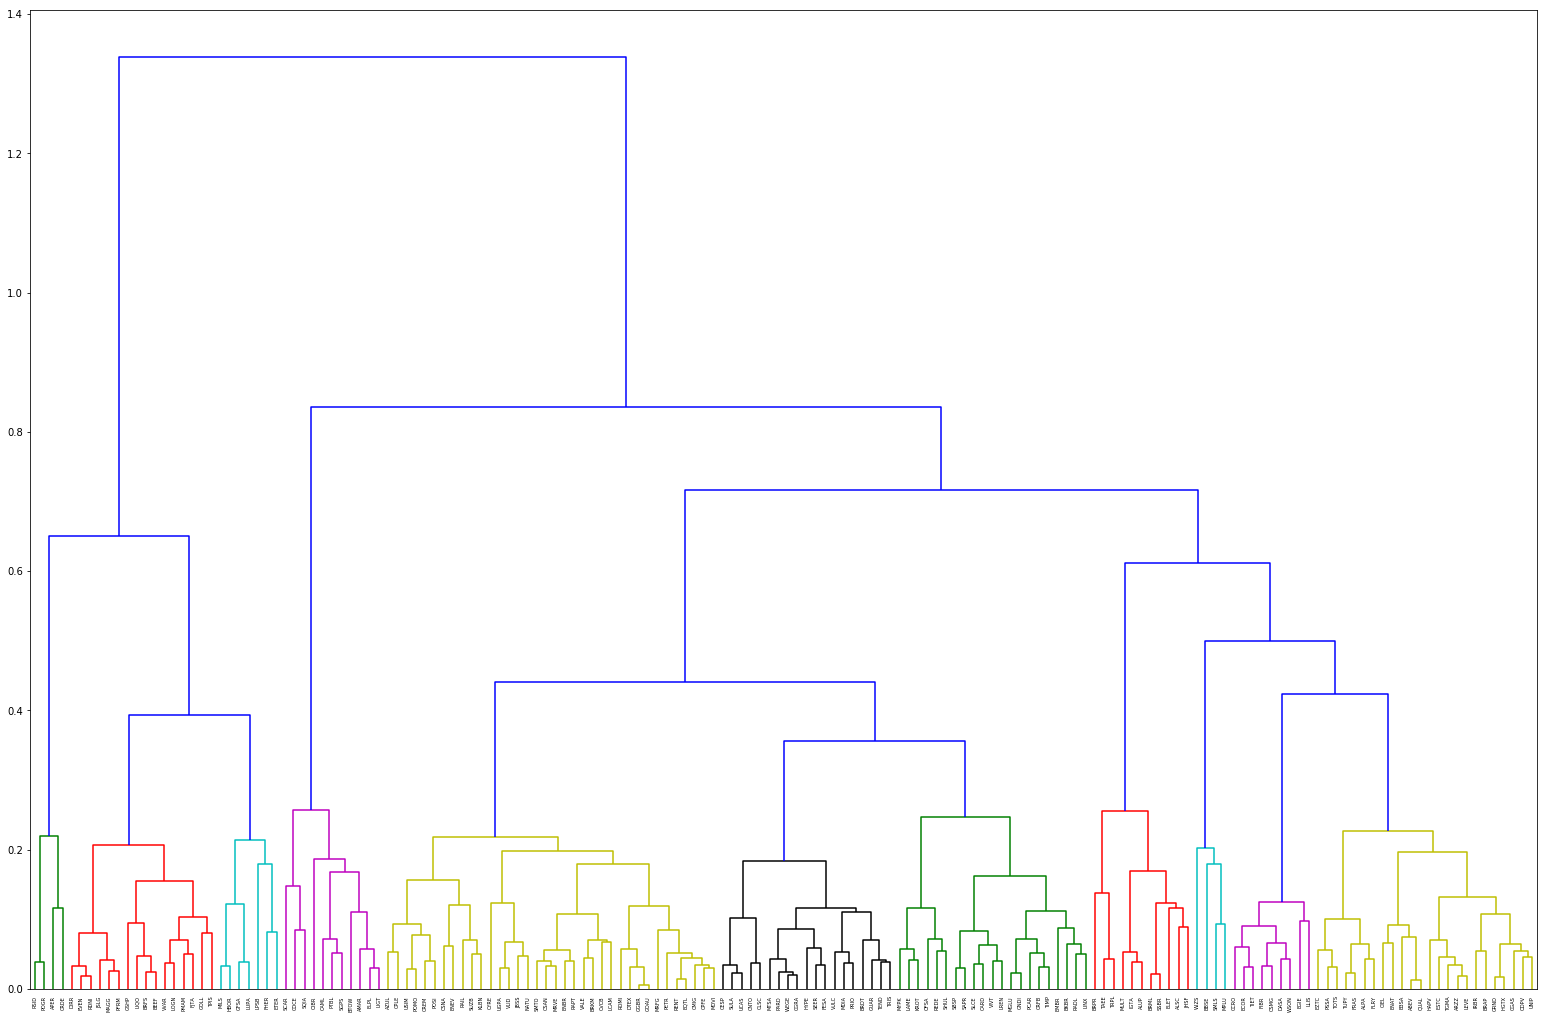

In [15]:
plt.figure(figsize=(27,18))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,
            color_threshold=0.3
          )
axes = plt.gca()
plt.savefig('_dendogram.pdf')
plt.show()

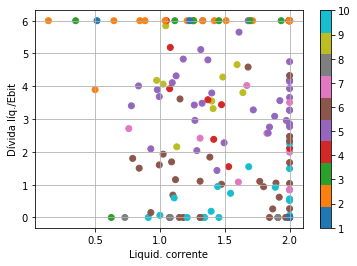

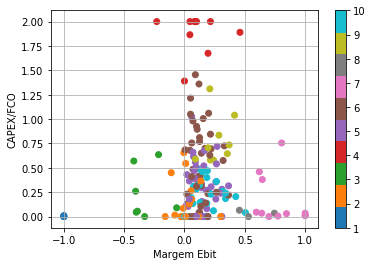

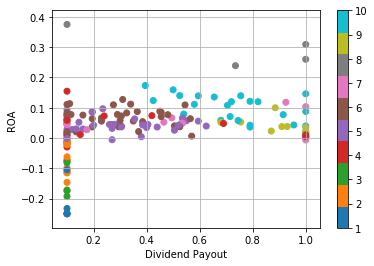

In [5]:
colors = scipy.cluster.hierarchy.fcluster(linked, 10, criterion='maxclust').tolist()

N = int(np.floor(len(param_list)/2))
M = int(np.floor((N+1)/2))
# plt.figure(figsize=(15, 5*M))
for n in range(0,N):
#     plt.subplot(M,2,n+1)
    plt.scatter(X[:,2*n], X[:,2*n+1], c=colors, cmap='tab10') # cmap = ['g', 'r', 'c', 'm', 'y', 'k']
    plt.xlabel(param_list[2*n])
    plt.ylabel(param_list[2*n+1])
    plt.grid()
    plt.colorbar()
    s = '_parameter_space_'+str(n)+'.pdf'
    plt.savefig(s)
    plt.show()

In [23]:
dfX=pd.DataFrame(X,columns=param_list,index=labelList)
cluster = scipy.cluster.hierarchy.fcluster(linked, 10, criterion='maxclust')
dfX['cluster'] = cluster
dfX[(dfX['cluster'] == 10)]

,Liquid. corrente,Dívida líq./Ebit,Margem Ebit,CAPEX/FCO,Dividend Payout,ROA,cluster
ABEV,1.075,0.000000,0.340,0.185,0.720,0.119916,10
B3SA,1.345,0.000000,0.505,0.040,0.680,0.058438,10
IRBR,0.910,0.000000,0.175,0.000,0.540,0.079060,10
HAPV,1.210,0.000000,0.185,0.400,1.000,0.145960,10
CIEL,1.110,0.595682,0.315,0.260,1.000,0.039672,10
PSSA,1.310,0.000000,0.070,0.135,0.955,0.042903,10
ALPA,2.000,0.067519,0.110,0.490,0.715,0.070884,10
BRAP,1.330,0.000000,0.000,0.000,0.580,0.111228,10
CGAS,1.685,1.547841,0.265,0.360,0.500,0.159126,10
ODPV,1.455,0.000000,0.240,0.060,0.395,0.173214,10


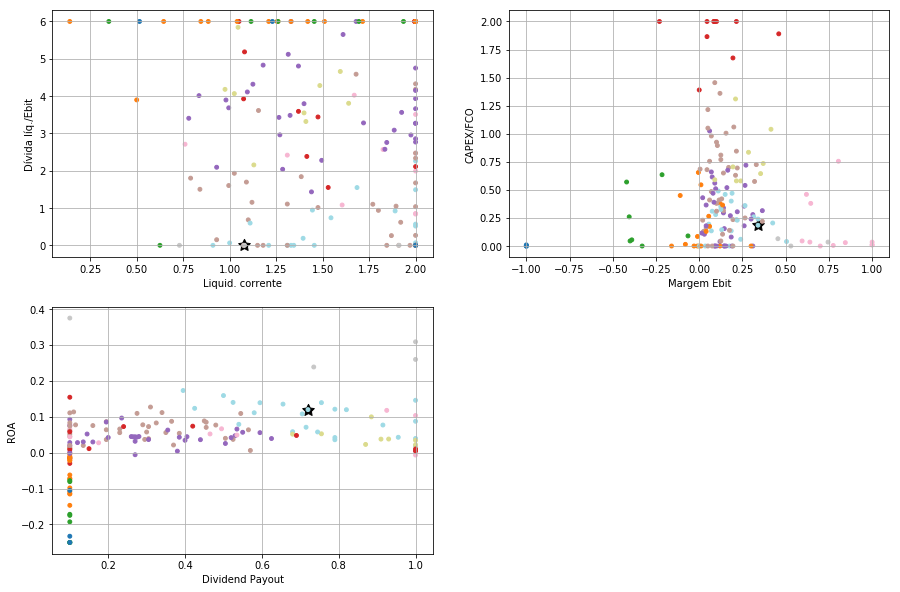

In [24]:
stocks = ['ABEV']
# stocks = ['PSSA','FRAS','ENAT','HAPV','BRAP','UNIP']
# stocks = dfX[(dfX['cluster'] == 10)].index

colors = fcluster(linked, 10, criterion='maxclust').tolist()
xx = np.array(dfX.loc[stocks])

plt.figure(figsize=(15, 5*M))
for n in range(0,N):
    plt.subplot(M,2,n+1)
    plt.scatter(xx[:,2*n], xx[:,2*n+1], c='black', marker=(5, 1), s=150)
    plt.scatter(X[:,2*n], X[:,2*n+1], c=colors, cmap='tab20', s=15)
    plt.xlabel(param_list[2*n])
    plt.ylabel(param_list[2*n+1])
    plt.grid()
plt.show()

In [21]:
cluster = scipy.cluster.hierarchy.fcluster(linked, 0.35, criterion='distance')

dfX=pd.DataFrame(X,columns=param_list,index=labelList)
dfX['cluster'] = cluster
dfX[(dfX['cluster'] == 9)]

,Liquid. corrente,Dívida líq./Ebit,Margem Ebit,CAPEX/FCO,Dividend Payout,ROA,cluster
BBSE,2.00,0.0,0.000,0.000,1.000,0.308827,9
SMLS,1.91,0.0,0.745,0.035,0.735,0.238696,9
MPLU,1.08,0.0,0.455,0.065,1.000,0.259809,9
WIZS,0.73,0.0,0.530,0.000,0.100,0.374942,9


In [9]:
df = pd.read_csv('PDGR.csv', index_col=0)
df

,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
NaN,2007.00,2008.0,2009.0,2010.00,2011.00,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
Receita líquida,552.00,1231.0,1983.0,5229.00,6877.00,4358.0,5316.0,4256.0,1824.0,247.0,458.0,213.0,277.0
Resultado bruto,196.00,433.0,576.0,1524.00,1793.00,-806.0,1098.0,824.0,-42.0,-725.0,25.0,32.0,20.0
Margem bruta,0.36,0.35,0.29,0.29,0.26,-0.18,0.21,0.19,-0.02,-2.94,0.05,0.15,0.07
Ebit,158.00,232.0,346.0,850.00,910.00,-1846.0,242.0,164.0,-2128.0,-4621.0,-1774.0,-404.0,-343.0
Margem Ebit,0.29,0.19,0.17,0.16,0.13,-0.42,0.05,0.04,-1.17,-18.71,-3.87,-1.9,-1.24
Ebitda,176.00,236.0,351.0,876.00,1057.00,-1671.0,316.0,222.0,-1716.0,-4710.0,-1746.0,-359.0,-339.0
Margem Ebitda,0.32,0.19,0.18,0.17,0.15,-0.38,0.06,0.05,-0.94,-19.07,-3.81,-1.69,-1.22
Res. Financeiro,-36.00,28.0,52.0,52.00,-37.00,-116.0,-269.0,-485.0,-671.0,-810.0,2727.0,-465.0,-501.0
Lucro líquido,89.00,213.0,333.0,789.00,708.00,-2172.0,-153.0,-475.0,-2842.0,-5430.0,160.0,-846.0,-824.0


In [10]:
stocks = ['EGIE','LAME']
dfX.loc[stocks]

,Liquid. corrente,Dívida líq./Ebit,Margem Ebit,CAPEX/FCO,Dividend Payout,ROA,cluster
EGIE,1.13,2.154528,0.415,1.040,0.885,0.099803,10
LAME,2.00,4.181217,0.100,0.925,0.570,0.006216,7


In [11]:
dfX[dfX['Dívida líq./Ebit']<0]

,Liquid. corrente,Dívida líq./Ebit,Margem Ebit,CAPEX/FCO,Dividend Payout,ROA,cluster


In [12]:
Xn = preprocessing.normalize(X, axis=0)
linked = linkage(Xn, 'ward') # single, average, complete, ward

DB_score = []
Si_score = []
CH_score = []
for k in range(2,51):
    cluster = fcluster(linked, k, criterion='maxclust')
    DB_score.append([k,metrics.davies_bouldin_score(Xn,cluster)])
    Si_score.append([k,metrics.silhouette_score(Xn,cluster)]) 
#     CH_score.append([k,metrics.calinski_harabasz_score(Xn,cluster)])
DB_score_ward = np.array(DB_score)
Si_score_ward = np.array(Si_score)
print(DB_score_ward)
print(Si_score_ward)

C:\Users\Plinio\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\Plinio\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\Plinio\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\Plinio\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\Plinio\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_

[[ 2.          1.08877847]
 [ 3.          1.01060174]
 [ 4.          1.44570519]
 [ 5.          1.28419944]
 [ 6.          1.19813843]
 [ 7.          1.1464164 ]
 [ 8.          1.219858  ]
 [ 9.          1.1473651 ]
 [10.          1.17373801]
 [11.          1.14157945]
 [12.          1.14295698]
 [13.          1.13990135]
 [14.          1.14694922]
 [15.          1.15888931]
 [16.          1.10407249]
 [17.          1.189405  ]
 [18.          1.17516024]
 [19.          1.16718562]
 [20.          1.13093581]
 [21.          1.13003058]
 [22.          1.11266932]
 [23.          1.07648903]
 [24.          1.0712994 ]
 [25.          1.01294385]
 [26.          0.96737876]
 [27.          0.95928536]
 [28.          0.95328441]
 [29.          0.93493385]
 [30.          0.94168183]
 [31.          0.93413815]
 [32.          0.93711967]
 [33.          0.910003  ]
 [34.          0.88629459]
 [35.          0.89948733]
 [36.          0.91837773]
 [37.          0.90117532]
 [38.          0.90898068]
 

C:\Users\Plinio\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\Plinio\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\Plinio\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\Plinio\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\Plinio\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_di

In [13]:
plt.plot(DB_score_single[:,0],DB_score_single[:,1],)
plt.plot(DB_score_average[:,0],DB_score_average[:,1],)
plt.plot(DB_score_complete[:,0],DB_score_complete[:,1],)
plt.plot(DB_score_ward[:,0],DB_score_ward[:,1],)
plt.legend(('single','average','complete', 'ward'),
           loc='lower right')
axes = plt.gca()
axes.set_xlim([2,20])
axes.set_ylim([0,1.5])
axes.set_title('Davies Bouldin Score')
axes.set_xlabel('Number of clusters')
plt.grid()
plt.savefig('_davies_bouldin.pdf')
plt.show()

NameError: name 'DB_score_single' is not defined

In [ ]:
plt.plot(Si_score_single[:,0],Si_score_single[:,1],)
plt.plot(Si_score_average[:,0],Si_score_average[:,1],)
plt.plot(Si_score_complete[:,0],Si_score_complete[:,1],)
plt.plot(Si_score_ward[:,0],Si_score_ward[:,1],)
plt.legend( ('single','average','complete', 'ward'),
            loc='upper right')
axes = plt.gca()
axes.set_xlim([2,20])
axes.set_ylim([0,0.6])
axes.set_title('Silhouette Score')
axes.set_xlabel('Number of clusters')
plt.grid()
plt.savefig('_silhouette_score.pdf')
plt.show()